# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

'lorengau'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
temp = []
hum = []
clouds = []
wind = []

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for name in cities:
    
    try:
        response = requests.get(query_url + name).json()
        temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        print("Completed Response for " + name)
        time.sleep(1.2)
    except:
        time.sleep(1.2)
        print("Skpping " + name)
        continue

        

Completed Response for taoudenni
Completed Response for san cristobal
Completed Response for ushuaia
Completed Response for mar del plata
Skpping yeletskiy
Completed Response for dingle
Skpping rungata
Completed Response for hofn
Completed Response for upernavik
Completed Response for port alfred
Skpping katha
Completed Response for isangel
Completed Response for cabo san lucas
Completed Response for muros
Completed Response for celestun
Completed Response for lorengau
Completed Response for aksu
Skpping aflu
Completed Response for murray bridge
Completed Response for torbay
Completed Response for new norfolk
Completed Response for khatanga
Completed Response for cape town
Completed Response for avarua
Completed Response for camacha
Completed Response for hermanus
Completed Response for saquarema
Skpping amderma
Completed Response for busselton
Completed Response for talnakh
Completed Response for bredasdorp
Skpping ondorhaan
Completed Response for nuuk
Completed Response for saint geo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame
df = pd.Dataframe({"lat

In [18]:
df = pd.DataFrame({"lat":lat, "Max Temp": temp, 
                   "Wind Speed": wind, "Humidity": hum, "Cloudiness":clouds})

df.to_csv("output.csv")
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
df.head()

,lat,Max Temp,Wind Speed,Humidity,Cloudiness
0,22.68,117.13,13.62,4,0
1,14.68,77.35,7.18,60,96
2,-54.81,32.00,11.41,92,75
3,-46.43,34.15,10.22,45,100
4,11.00,76.63,5.19,82,100


In [28]:
df.loc[df["Humidity"] > 100]

,lat,Max Temp,Wind Speed,Humidity,Cloudiness
228,-3.75,42.8,3.36,319,75
369,-8.47,35.6,6.93,331,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# uncomment the line below to load data from csv
# df = pd.read_csv("output.csv")
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
# df.head()

,Unnamed: 0,lat,Max Temp,Wind Speed,Humidity,Cloudiness
0,0,22.68,117.13,13.62,4,0
1,1,14.68,77.35,7.18,60,96
2,2,-54.81,32.00,11.41,92,75
3,3,-46.43,34.15,10.22,45,100
4,4,11.00,76.63,5.19,82,100


#### Latitude vs. Temperature Plot

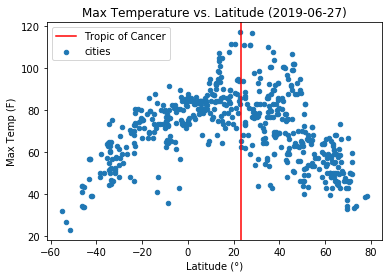

In [9]:
df.plot(kind="scatter",x = "lat", y="Max Temp", label="cities")
plt.axvline(x=23.43676, color='red', label="Tropic of Cancer")
plt.title(f"Max Temperature vs. Latitude ({date})")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (°)")
plt.legend()
plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

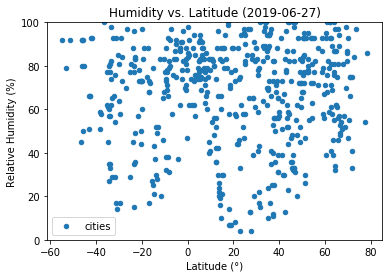

In [10]:
df.plot(kind="scatter",x = "lat", y="Humidity", label="cities")
plt.title(f"Humidity vs. Latitude ({date})")
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Latitude (°)")
plt.ylim(0,100)
plt.savefig("humidity.png")
plt.legend()

#### Latitude vs. Cloudiness Plot

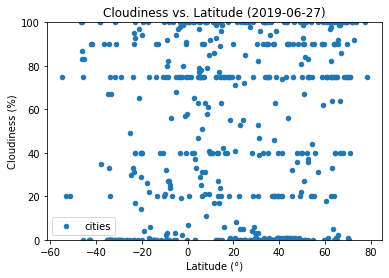

In [11]:
df.plot(kind="scatter",x = "lat", y="Cloudiness", label="cities")
plt.title(f"Cloudiness vs. Latitude ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (°)")
plt.ylim(0,100)
plt.legend()
plt.savefig("cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

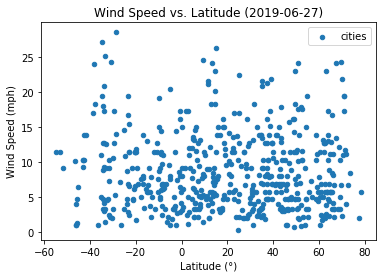

In [12]:
df.plot(kind="scatter",x = "lat", y="Wind Speed", label="cities")
plt.title(f"Wind Speed vs. Latitude ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (°)")
plt.legend()
plt.savefig("wind.png")
plt.show()

## Conclusions
* In general, cities closer to the equator have higher max temperatures than the cities closer to the poles. It appears that the tropic of cancer is the latitude that cooresponds to the peak of this curve. This is expected since we recently passed the june equinox.

* The temperature curve is not symmetric about its maximum. This may be due to local temperature fluctions. Currently there is a heatwave in europe, which could explain the high temperatures beyond 40 degrees latitude.

* Cities near the equator are less likely to have low relative humidty, in comparison to cities in the tropics. More samples are required to decisivly conclude that the poles also have low relative humidtiy.

* There is no clearly visible trend in cloudiness and wind. These weather factors are more chaotic and depdent on geographic features such as altitude and climate groups.
